**Creation of a List of (public-) Holidays in germany**

Creation of a list of Holidays by using the 'holidays' library

In [1]:
# Import necessary libraries
import pandas as pd
import locale
import datetime as dt
from datetime import date
%pip install holidays
%pip install workalendar
import holidays
from workalendar.europe import Germany
from workalendar.europe.germany import SchleswigHolstein


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 954.8/954.8 kB 46.3 MB/s eta 0:00:00

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 69.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pymeeus: filename=pymeeus-0.5.12-py3-none-any.whl size=732093 sha256=c4fcdb2c05d4978142aa0c89ff51dfcb32ac495cfd8d5be4361c1b8026e40260
  Stored in directory: /home/codespace/.cache/pip/wheels/92/74/5d/5cf1193a619dc315b5b0a158876900e21440c71130251307b6
Successfully built pymeeus

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Create an empty list to store the holidays
ger_holidays_list = []


# Select country
cal = Germany()
cal.holidays()


# Create a list of holidays for a specific year
for year in range(2012, 2020):
    ger_holidays_list += cal.holidays(year)


# create a dictionary with holiday names of cal holidays with german name and save as cal_ger dictionary
# Create a dictionary to map the English holiday names to German names
cal_ger = {
    "New Year": "Silvester/Neujahr",
    "Good Friday": "Karfreitag",
    "Easter Sunday": "Ostermontag",
    "Easter Monday": "Ostermontag",
    "Ascension Thursday": "Mariä Empfängnis",
    "Whit Monday": "Pfingstmontag",
    "Corpus Christi": "Fronleichnam",
    "Assumption of Mary": "Mariä Himmelfahrt",
    "Day of German Unity": "Tag der Deutschen Einheit",
    "Reformation Day": "Reformationstag",
    "All Saints' Day": "Allerheiligentag",
    "Christmas Day": "1. Weihnachtstag",
    "Second Christmas Day": "2. Weihnachtstag",
    "New Year's Eve": "Silvester",
    "Labour Day": "Tag der Arbeit",
}
# Replace names in 'Feiertag' column with German names in cal_ger dictionary
for holiday in ger_holidays_list:
    # Check if the holiday is in the cal_ger dictionary
    if holiday in cal_ger:
        # Replace the English name with the German name
        holiday = cal_ger[holiday]
        # else no change
    else:
        pass

    # convert to dataframe in timedate format and add a column with the name of the holiday and set date

    ger_holidays_df = pd.DataFrame(ger_holidays_list, columns=["Datum", "Feiertag"])
    ger_holidays_df["Datum"] = pd.to_datetime(ger_holidays_df["Datum"])


# Add columns for the day of the week
ger_holidays_df["Wochentag"] = ger_holidays_df["Datum"].dt.day_name()
# Add column for if is holiday is true write 1 else 0
# check if it is a holiday and add a column with 1 if it is a holiday and 0 if it is not
ger_holidays_df["Is_Holiday"] = ger_holidays_df["Feiertag"].apply(
    lambda x: 1 if x else 0
)

# apply cal_ger holidays to ger_holidays_df
ger_holidays_df["Feiertag"] = ger_holidays_df["Feiertag"].replace(cal_ger)


print(ger_holidays_df)

# Save the dataframe to a csv file

ger_holidays_df.to_csv("german_holidays.csv", index=False)

        Datum                   Feiertag  Wochentag  Is_Holiday
0  2012-01-01                   New year     Sunday           1
1  2012-04-06                 Karfreitag     Friday           1
2  2012-04-09                Ostermontag     Monday           1
3  2012-05-01             Tag der Arbeit    Tuesday           1
4  2012-05-17         Mariä Empfängnis   Thursday           1
..        ...                        ...        ...         ...
68 2019-05-30         Mariä Empfängnis   Thursday           1
69 2019-06-10              Pfingstmontag     Monday           1
70 2019-10-03  Tag der Deutschen Einheit   Thursday           1
71 2019-12-25           1. Weihnachtstag  Wednesday           1
72 2019-12-26           2. Weihnachtstag   Thursday           1

[73 rows x 4 columns]


In [3]:
# Convert merged_data_clean.csv to datetime format
ki_we_umsatz_df = pd.read_csv("merged_data_clean.csv")
ki_we_umsatz_df["Datum"] = pd.to_datetime(ki_we_umsatz_df["Datum"])


# Drop rows if 'Umsatz' is NaN
ki_we_umsatz_df = ki_we_umsatz_df.dropna(subset=["Umsatz"])


# Replace all NaN values with 0
ki_we_umsatz_df = ki_we_umsatz_df.fillna(0)
# save the ki_we_umsatz_df to a csv file
ki_we_umsatz_df.to_csv("ki_we_umsatz.csv", index=False)

print(ki_we_umsatz_df.head())

         Datum  Bewoelkung  Temperatur  Windgeschwindigkeit  Wettercode  \
394 2013-07-01         6.0       17.84                   15        20.0   
395 2013-07-01         6.0       17.84                   15        20.0   
396 2013-07-01         6.0       17.84                   15        20.0   
397 2013-07-01         6.0       17.84                   15        20.0   
398 2013-07-01         6.0       17.84                   15        20.0   

            id  Warengruppe  Umsatz  KielerWoche  
394  1307011.0          1.0  148.83          0.0  
395  1307012.0          2.0  535.86          0.0  
396  1307013.0          3.0  201.20          0.0  
397  1307014.0          4.0   65.89          0.0  
398  1307015.0          5.0  317.48          0.0  


In [4]:
# Merge the ki_we_umsatz_df with the ger_holidays_df on the 'Datum' column
ger_holidays_df["Datum"] = pd.to_datetime(ger_holidays_df["Datum"])
# Merge the two dataframes on the 'Datum' column
ho_ki_we_umsatz_df = pd.merge(ki_we_umsatz_df, ger_holidays_df, on="Datum", how="left")
# Check if the merge was successful
print(ho_ki_we_umsatz_df.head())

       Datum  Bewoelkung  Temperatur  Windgeschwindigkeit  Wettercode  \
0 2013-07-01         6.0       17.84                   15        20.0   
1 2013-07-01         6.0       17.84                   15        20.0   
2 2013-07-01         6.0       17.84                   15        20.0   
3 2013-07-01         6.0       17.84                   15        20.0   
4 2013-07-01         6.0       17.84                   15        20.0   

          id  Warengruppe  Umsatz  KielerWoche Feiertag Wochentag  Is_Holiday  
0  1307011.0          1.0  148.83          0.0      NaN       NaN         NaN  
1  1307012.0          2.0  535.86          0.0      NaN       NaN         NaN  
2  1307013.0          3.0  201.20          0.0      NaN       NaN         NaN  
3  1307014.0          4.0   65.89          0.0      NaN       NaN         NaN  
4  1307015.0          5.0  317.48          0.0      NaN       NaN         NaN  


In [5]:
# Replace all NaN values with 0
ho_ki_we_umsatz_df = ho_ki_we_umsatz_df.fillna(0)
# Add day names to 'Wochentag' column
ho_ki_we_umsatz_df["Wochentag"] = ho_ki_we_umsatz_df["Datum"].dt.day_name()
# Check if  successful
print(ho_ki_we_umsatz_df.head())

# Save the merged dataframe to a csv file
ho_ki_we_umsatz_df.to_csv("ho_ki_we_umsatz.csv", index=False)

       Datum  Bewoelkung  Temperatur  Windgeschwindigkeit  Wettercode  \
0 2013-07-01         6.0       17.84                   15        20.0   
1 2013-07-01         6.0       17.84                   15        20.0   
2 2013-07-01         6.0       17.84                   15        20.0   
3 2013-07-01         6.0       17.84                   15        20.0   
4 2013-07-01         6.0       17.84                   15        20.0   

          id  Warengruppe  Umsatz  KielerWoche Feiertag Wochentag  Is_Holiday  
0  1307011.0          1.0  148.83          0.0        0    Monday         0.0  
1  1307012.0          2.0  535.86          0.0        0    Monday         0.0  
2  1307013.0          3.0  201.20          0.0        0    Monday         0.0  
3  1307014.0          4.0   65.89          0.0        0    Monday         0.0  
4  1307015.0          5.0  317.48          0.0        0    Monday         0.0  


In [8]:
# define temperature range in low, medium and high  of column 'Temperatur'
def categorize_temperature(temp):
    if temp < 0:
        return "low"
    elif 0 <= temp <= 20:
        return "medium"
    else:
        return "high"


# define seasons in spring, summer, autumn and winter of column 'Datum'
def categorize_season(date):
    if date.month in [3, 4, 5]:
        return "spring"
    elif date.month in [6, 7, 8]:
        return "summer"
    elif date.month in [9, 10, 11]:
        return "autumn"
    else:
        return "winter"

In [9]:
# Calculate average temperature for each month
avg_temp_by_month = ho_ki_we_umsatz_df.groupby(ho_ki_we_umsatz_df["Datum"].dt.month)[
    "Temperatur"
].mean()

# Create a new column 'Avg_Temperature_Category' based on the average temperature avg_temp_by_month
ho_ki_we_umsatz_df["Avg_Temperature_Category"] = ho_ki_we_umsatz_df["Temperatur"].apply(
    categorize_temperature
)

# Create a new column 'Season' based on the month
ho_ki_we_umsatz_df["Season"] = ho_ki_we_umsatz_df["Datum"].apply(categorize_season)

# Calculate average sales from the 'Umsatz' column for each month
avg_sales_by_month = ho_ki_we_umsatz_df.groupby(ho_ki_we_umsatz_df["Datum"].dt.month)[
    "Umsatz"
].mean()

# Calculate average sales on days of the week based on the 'Wochentag' column
avg_sales_by_weekday = ho_ki_we_umsatz_df.groupby(ho_ki_we_umsatz_df["Wochentag"])[
    "Umsatz"
].mean()

# Calculate average sales per day  based on weekday name of the column 'Wochentag'
avg_sales_by_day = ho_ki_we_umsatz_df.groupby(
    ho_ki_we_umsatz_df["Datum"].dt.day_name()
)["Umsatz"].mean()

# Calculate average sales per day on weekends based on the 'Wochentag' column
avg_sales_on_weekends = ho_ki_we_umsatz_df[
    ho_ki_we_umsatz_df["Wochentag"].isin(["Saturday", "Sunday"])
]["Umsatz"].mean()

# calculate average sales per day on workdays based on the 'Wochentag' column from Monday to Friday
avg_sales_on_workdays = ho_ki_we_umsatz_df[
    ho_ki_we_umsatz_df["Wochentag"].isin(
        ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
    )
]["Umsatz"].mean()
# Calculate average sales per day on weekends based on the 'Wochentag' column on Saturday and Sunday
avg_sales_on_weekends = ho_ki_we_umsatz_df[
    ho_ki_we_umsatz_df["Wochentag"].isin(["Saturday", "Sunday"])
]["Umsatz"].mean()


# Calculate average sales per day on holidays based on the 'Is_Holiday' column
avg_sales_on_holidays = ho_ki_we_umsatz_df[ho_ki_we_umsatz_df["Is_Holiday"] == 1][
    "Umsatz"
].mean()
# Calculate average sales per day on holidays based on the 'Is_Holiday' by "Feiertag" column
avg_sales_on_holidays_by_feiertag = ho_ki_we_umsatz_df[
    ho_ki_we_umsatz_df["Feiertag"] != "-"
]["Umsatz"].mean()
# Calculate average sales per day on normal weekdays based on the 'Is_Holiday' column
avg_sales_on_normal_weekdays = ho_ki_we_umsatz_df[
    ho_ki_we_umsatz_df["Is_Holiday"] == 0
]["Umsatz"].mean()

# show head of the dataframe
print(ho_ki_we_umsatz_df.head())

import matplotlib.pyplot as plt

       Datum  Bewoelkung  Temperatur  Windgeschwindigkeit  Wettercode  \
0 2013-07-01         6.0       17.84                   15        20.0   
1 2013-07-01         6.0       17.84                   15        20.0   
2 2013-07-01         6.0       17.84                   15        20.0   
3 2013-07-01         6.0       17.84                   15        20.0   
4 2013-07-01         6.0       17.84                   15        20.0   

          id  Warengruppe  Umsatz  KielerWoche Feiertag Wochentag  Is_Holiday  \
0  1307011.0          1.0  148.83          0.0        0    Monday         0.0   
1  1307012.0          2.0  535.86          0.0        0    Monday         0.0   
2  1307013.0          3.0  201.20          0.0        0    Monday         0.0   
3  1307014.0          4.0   65.89          0.0        0    Monday         0.0   
4  1307015.0          5.0  317.48          0.0        0    Monday         0.0   

  Avg_Temperature_Category  Season  
0                   medium  summer  


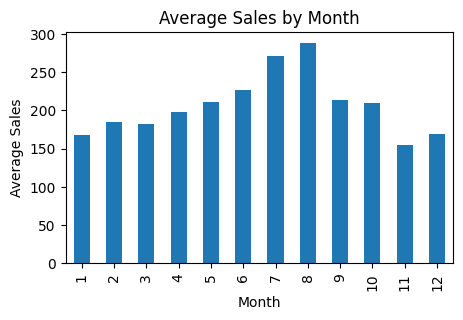

In [10]:
# graph the average sales by month
plt.figure(figsize=(5, 3))
avg_sales_by_month.plot(kind="bar")
plt.xlabel("Month")
plt.ylabel("Average Sales")
plt.title("Average Sales by Month")
plt.show()

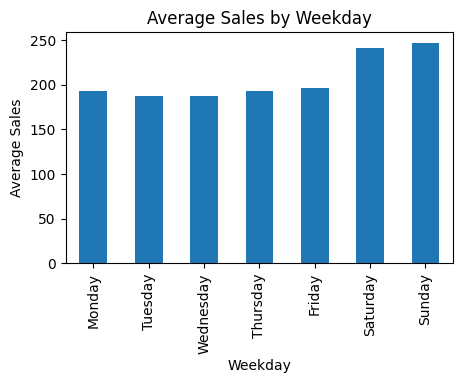

In [11]:
# graph the average sales by weekday
# change the order of the weekdays to start with Monday
weekdays = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday",
]
avg_sales_by_weekday = avg_sales_by_weekday.reindex(weekdays)
# plot the average sales by weekday
plt.figure(figsize=(5, 3))
avg_sales_by_weekday.plot(kind="bar")
plt.xlabel("Weekday")
plt.ylabel("Average Sales")
plt.title("Average Sales by Weekday")
plt.show()

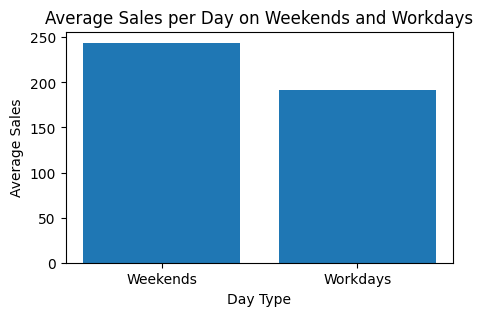

In [12]:
# graph average sales per day on weekends and workdays
# create a bar chart with two bars
plt.figure(figsize=(5, 3))
plt.bar(["Weekends", "Workdays"], [avg_sales_on_weekends, avg_sales_on_workdays])
plt.xlabel("Day Type")
plt.ylabel("Average Sales")
plt.title("Average Sales per Day on Weekends and Workdays")
plt.show()

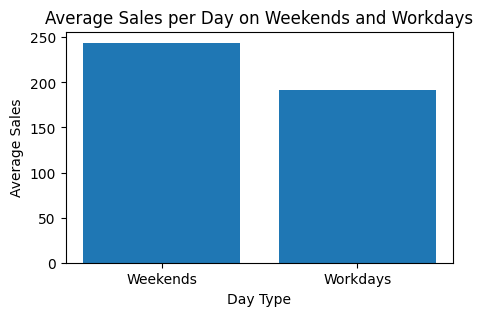

In [13]:
# graph average sales per day on weekends , workdays and holidays
# calculate average sales per day on holidays based on the 'Is_Holiday' column
# create a bar chart with two bars
plt.figure(figsize=(5, 3))
plt.bar(["Weekends", "Workdays"], [avg_sales_on_weekends, avg_sales_on_workdays])
plt.xlabel("Day Type")
plt.ylabel("Average Sales")
plt.title("Average Sales per Day on Weekends and Workdays")
plt.show()

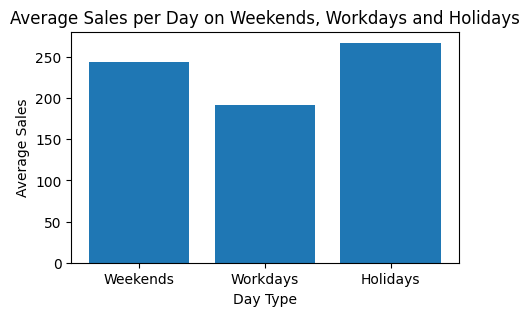

In [14]:
# graph average sales per day on weekend, workdays and holidays
# create a bar chart with three bars
plt.figure(figsize=(5, 3))
plt.bar(
    ["Weekends", "Workdays", "Holidays"],
    [avg_sales_on_weekends, avg_sales_on_workdays, avg_sales_on_holidays],
)
plt.xlabel("Day Type")
plt.ylabel("Average Sales")
plt.title("Average Sales per Day on Weekends, Workdays and Holidays")
plt.show()

In [15]:
# graph average sales per day on holidays sorted by 'Feiertag' column
import matplotlib.pyplot as plt

# Group by 'Feiertag' and calculate the mean sales for each holiday (excluding '-')
avg_holiday_sales_per_day = (
    ho_ki_we_umsatz_df[ho_ki_we_umsatz_df["Feiertag"] != "-"]
    .groupby("Feiertag")["Umsatz"]
    .mean()
)

plt.figure(figsize=(12, 4))
holiday_sales.plot(kind="bar")
plt.xlabel("Feiertag")
plt.ylabel("Average Sales")
plt.title("Average Sales per Day on Holidays")
plt.tight_layout()
plt.show()

NameError: name 'holiday_sales' is not defined

<Figure size 1200x400 with 0 Axes>

In [16]:
import seaborn

# plot the average sales per day on holidays avg_sales_on_holidays next to the average sales per day on normal weekdays avg_sales_on_normal_weekdays
# create a bar chart with two bars group by day type
grouped_avg_sales_by_day_type = pd.DataFrame(
    {"Holidays": avg_sales_on_holidays, "Normal Weekdays": avg_sales_on_normal_weekdays}
)
# plot the average sales per day on holidays avg_sales_on_holidays next to the average sales per day on normal weekdays avg_sales_on_normal_weekdays

ValueError: If using all scalar values, you must pass an index